# PROCESSAMENTO DOS DADOS DOS SENSOR NO MODO SEM PLANTA

Data de início: 16/02/2022
Data de término: 21/02/2022

## Bibliotecas importantes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importação dos dados

In [3]:
base = pd.read_csv('/content/comPlanta19062023 - Página1.csv')

In [4]:
base

,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-6-15 00:41:59,400,71.3,1014.91,167957,21032,14115,69,29.45,3005,0
1,2023-6-15 00:42:09,400,71.1,1014.90,160424,21038,14106,65,29.25,3005,0
2,2023-6-15 00:42:19,400,71.5,1014.89,153679,21045,14114,57,29.17,3004,0
3,2023-6-15 00:42:29,400,72.4,1014.89,148389,21047,14114,59,29.16,3004,0
4,2023-6-15 00:42:39,400,71.2,1014.90,182546,21051,14109,61,29.92,3003,0
...,...,...,...,...,...,...,...,...,...,...,...
27798,2023-06-18 05:54:59,1172,72.5,1015.41,158160,20000,13722,2302,30.85,3174,0
27799,2023-06-18 05:55:09,1140,72.3,1015.40,152979,19999,13735,2355,30.82,3177,0
27800,2023-06-18 05:55:19,1133,71.6,1015.40,181169,20015,13740,2254,31.54,3172,0
27801,2023-06-18 05:55:29,1144,72.8,1015.40,171032,20025,13732,2219,31.09,3172,0


## Informações básicas do dataset

In [5]:
print("shape: ", base.shape)
print("index: ", base.index)
print("columns: ", base.columns)
print("count: ", base.count)

shape:  (27803, 11)
index:  RangeIndex(start=0, stop=27803, step=1)
columns:  Index(['_key', 'co2SGP', 'humBME', 'pressBME', 'resBME', 'sgpEthanol', 'sgpH2',
       'sgpTVOC', 'tempBME', 'tempSHT31', 'tlsLUX'],
      dtype='object')
count:  <bound method DataFrame.count of                       _key  co2SGP  humBME  pressBME  resBME  sgpEthanol  \
0       2023-6-15 00:41:59     400    71.3   1014.91  167957       21032   
1       2023-6-15 00:42:09     400    71.1   1014.90  160424       21038   
2       2023-6-15 00:42:19     400    71.5   1014.89  153679       21045   
3       2023-6-15 00:42:29     400    72.4   1014.89  148389       21047   
4       2023-6-15 00:42:39     400    71.2   1014.90  182546       21051   
...                    ...     ...     ...       ...     ...         ...   
27798  2023-06-18 05:54:59    1172    72.5   1015.41  158160       20000   
27799  2023-06-18 05:55:09    1140    72.3   1015.40  152979       19999   
27800  2023-06-18 05:55:19    1133    71.6

## Análise estatística preliminar

In [6]:
base.describe()

,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
count,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000,27803.000000
mean,434.658346,71.016362,1015.154521,171688.920476,20996.264216,14129.441032,194.713988,30.719790,3138.034061,8108.358810
std,127.860638,1.670323,1.085213,18366.736476,198.246055,86.193508,790.980794,0.829017,77.879031,7738.151117
min,400.000000,64.000000,1012.930000,100975.000000,18904.000000,13209.000000,0.000000,27.790000,2896.000000,0.000000
25%,400.000000,70.000000,1014.340000,159511.000000,20990.000000,14113.000000,75.000000,30.290000,3092.000000,0.000000
50%,400.000000,71.200000,1015.170000,170166.000000,21029.000000,14150.000000,112.000000,30.770000,3144.000000,12900.000000
75%,417.000000,72.300000,1016.110000,183542.000000,21062.000000,14175.000000,137.000000,31.300000,3186.000000,15500.000000
max,2602.000000,76.200000,1017.900000,260591.000000,21294.000000,14227.000000,18555.000000,33.310000,3384.000000,23400.000000


### Identificando os menores valores

In [7]:
print("Menores valores de co2SGP")
base.loc[base['co2SGP'] <= 400.000000]

Menores valores de co2SGP


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-6-15 00:41:59,400,71.3,1014.91,167957,21032,14115,69,29.45,3005,0
1,2023-6-15 00:42:09,400,71.1,1014.90,160424,21038,14106,65,29.25,3005,0
2,2023-6-15 00:42:19,400,71.5,1014.89,153679,21045,14114,57,29.17,3004,0
3,2023-6-15 00:42:29,400,72.4,1014.89,148389,21047,14114,59,29.16,3004,0
4,2023-6-15 00:42:39,400,71.2,1014.90,182546,21051,14109,61,29.92,3003,0
...,...,...,...,...,...,...,...,...,...,...,...
25066,2023-06-17 22:19:39,400,72.1,1015.65,172790,21050,14187,98,31.32,3223,16800
25069,2023-06-17 22:20:09,400,71.8,1015.65,190033,21055,14192,100,31.59,3223,12700
25072,2023-06-17 22:20:39,400,71.6,1015.65,170512,21062,14186,98,31.32,3220,14100
25075,2023-06-17 22:21:09,400,71.4,1015.67,183342,21065,14188,100,31.44,3225,12800


In [8]:
print("Menores valores de humBME")
base.loc[base['humBME'] <= 64.000000]

Menores valores de humBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
10999,2023-06-16 07:15:09,400,64.0,1015.45,229159,21292,14208,0,27.84,2908,0


In [9]:
print("Menores valores de pressBME")
base.loc[base['pressBME'] <= 1012.930000]

Menores valores de pressBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
9431,2023-06-16 02:53:49,400,70.2,1012.93,146068,21016,14107,100,30.54,3142,17400
9433,2023-06-16 02:54:09,401,69.5,1012.93,167455,20999,14106,109,30.84,3144,13200


In [10]:
print("Menores valores de resBME")
base.loc[base['resBME'] <= 100975.000000]

Menores valores de resBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
8906,2023-06-16 01:26:19,466,71.7,1014.37,100975,20911,14052,175,30.63,3157,16800


In [11]:
print("Menores valores de sgpEthanol")
base.loc[base['sgpEthanol'] <= 	18904.000000]

Menores valores de sgpEthanol


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1961,2023-06-15 06:08:49,2433,69.8,1016.79,107291,18904,13240,18555,30.45,3161,17900


In [ ]:
print("Menores valores de sgpH2")
base.loc[base['sgpH2'] <= 13209.000000]

Menores valores de sgpH2


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1947,2023-06-15 06:06:29,2602,69.1,1016.6,130430,18918,13209,16882,31.15,3161,18300


In [12]:
print("Menores valores de sgpTVOC")
base.loc[base['sgpTVOC'] <= 0.000000]

Menores valores de sgpTVOC


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
2434,2023-06-15 07:27:39,400,70.2,1016.26,168969,21141,14076,0,31.00,3141,15500
2435,2023-06-15 07:27:49,400,70.5,1016.25,159360,21136,14073,0,30.55,3140,16400
2437,2023-06-15 07:28:09,400,70.6,1016.26,144065,21128,14074,0,30.33,3142,16500
2441,2023-06-15 07:28:49,400,70.1,1016.25,152287,21129,14074,0,30.41,3144,17900
2446,2023-06-15 07:29:39,400,70.4,1016.23,151327,21135,14078,0,30.41,3144,18100
...,...,...,...,...,...,...,...,...,...,...,...
11058,2023-06-16 07:24:59,400,65.5,1015.45,218698,21213,14185,0,28.51,2943,0
11059,2023-06-16 07:25:09,400,66.6,1015.44,205382,21212,14180,0,28.44,2943,0
11060,2023-06-16 07:25:19,400,66.5,1015.45,201624,21207,14177,0,28.40,2942,0
11061,2023-06-16 07:25:29,400,65.7,1015.46,239277,21213,14172,0,29.12,2943,0


In [13]:
print("Menores valores de tempBME")
base.loc[base['tempBME'] <= 27.790000]

Menores valores de tempBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
10990,2023-06-16 07:13:39,400,66.5,1015.44,214720,21286,14206,0,27.79,2905,0


In [14]:
print("Menores valores de tempSHT31")
base.loc[base['tempSHT31'] <= 2896.000000]

Menores valores de tempSHT31


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
10403,2023-06-16 05:35:49,451,71.0,1014.58,189272,20883,14071,191,28.42,2896,0
10409,2023-06-16 05:36:49,457,70.3,1014.61,183142,20885,14066,188,28.24,2896,0


In [15]:
print("Menores valores de tlsLUX")
base.loc[base['tlsLUX'] <= 0.000000]

Menores valores de tlsLUX


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-6-15 00:41:59,400,71.3,1014.91,167957,21032,14115,69,29.45,3005,0
1,2023-6-15 00:42:09,400,71.1,1014.90,160424,21038,14106,65,29.25,3005,0
2,2023-6-15 00:42:19,400,71.5,1014.89,153679,21045,14114,57,29.17,3004,0
3,2023-6-15 00:42:29,400,72.4,1014.89,148389,21047,14114,59,29.16,3004,0
4,2023-6-15 00:42:39,400,71.2,1014.90,182546,21051,14109,61,29.92,3003,0
...,...,...,...,...,...,...,...,...,...,...,...
27798,2023-06-18 05:54:59,1172,72.5,1015.41,158160,20000,13722,2302,30.85,3174,0
27799,2023-06-18 05:55:09,1140,72.3,1015.40,152979,19999,13735,2355,30.82,3177,0
27800,2023-06-18 05:55:19,1133,71.6,1015.40,181169,20015,13740,2254,31.54,3172,0
27801,2023-06-18 05:55:29,1144,72.8,1015.40,171032,20025,13732,2219,31.09,3172,0


### Identificando as linhas com os maiores valores

In [16]:
print("Maiores valores de co2SGP")
base.loc[base['co2SGP'] >= 2602.000000]

Maiores valores de co2SGP


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1947,2023-06-15 06:06:29,2602,69.1,1016.6,130430,18918,13209,16882,31.15,3161,18300


In [17]:
print("Maiores valores de humBME")
base.loc[base['humBME'] >= 76.200000]

Maiores valores de humBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
25547,2023-06-17 23:39:49,443,76.2,1016.4,154811,21080,14158,85,30.47,3135,17000


In [18]:
print("Maiores valores de pressBME")
base.loc[base['pressBME'] >= 1017.900000]

Maiores valores de pressBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
2005,2023-06-15 06:16:09,1561,70.0,1017.9,118816,19295,13467,8376,30.43,3150,18100
13843,2023-06-16 15:09:09,400,71.1,1017.9,163386,21058,14189,98,30.66,3141,16900
13844,2023-06-16 15:09:19,400,71.3,1017.9,158309,21055,14182,103,30.63,3140,13400
13887,2023-06-16 15:16:29,400,70.7,1017.9,170685,21051,14184,102,30.77,3141,15000
13888,2023-06-16 15:16:39,400,71.3,1017.9,162754,21045,14182,100,30.70,3144,17500
13891,2023-06-16 15:17:09,400,70.1,1017.9,181756,21055,14183,100,30.95,3144,17000
13895,2023-06-16 15:17:49,400,70.4,1017.9,190471,21059,14178,97,31.38,3145,13500
14291,2023-06-16 16:23:49,400,71.1,1017.9,177721,21044,14179,113,31.15,3167,14800
14292,2023-06-16 16:23:59,400,71.4,1017.9,167957,21034,14175,113,30.96,3168,14200


In [19]:
print("Maiores valores de resBME")
base.loc[base['resBME'] >= 260591.000000]

Maiores valores de resBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
11011,2023-06-16 07:17:09,400,64.5,1015.46,260591,21258,14197,0,28.72,2919,0


In [20]:
print("Maiores valores de sgpEthanol")
base.loc[base['sgpEthanol'] >= 21294.000000]

Maiores valores de sgpEthanol


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
10992,2023-06-16 07:13:59,400,65.7,1015.47,244227,21294,14214,0,28.07,2901,0


In [21]:
print("Maiores valores de sgpH2")
base.loc[base['sgpH2'] >= 14227.000000]

Maiores valores de sgpH2


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
12844,2023-06-16 12:22:39,400,69.1,1013.9,201133,21164,14227,35,30.52,3058,0


In [22]:
print("Maiores valores de sgpTVOC")
base.loc[base['sgpTVOC'] >= 18555.000000]

Maiores valores de sgpTVOC


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1961,2023-06-15 06:08:49,2433,69.8,1016.79,107291,18904,13240,18555,30.45,3161,17900


In [23]:
print("Maiores valores de tempBME")
base.loc[base['tempBME'] >= 33.310000]

Maiores valores de tempBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
27081,2023-06-18 03:55:29,677,68.0,1014.35,178856,20566,13965,574,33.31,3375,12300


In [24]:
print("Maiores valores de tempSHT31")
base.loc[base['tempSHT31'] >= 3384.000000]

Maiores valores de tempSHT31


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
27071,2023-06-18 03:53:49,681,69.1,1014.38,177534,20584,13969,542,33.28,3384,15800
27077,2023-06-18 03:54:49,684,68.6,1014.36,166625,20546,13967,592,32.84,3384,15300


In [25]:
print("Maiores valores de tlsLUX")
base.loc[base['tlsLUX'] >= 23400.000000]

Maiores valores de tlsLUX


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1094,2023-6-15 03:44:19,400,71.7,1014.53,163704,21074,14145,43,29.49,3010,23400


## Verificando se há valores nulos na base de dados

In [26]:
base.isnull().sum()

_key          0
co2SGP        0
humBME        0
pressBME      0
resBME        0
sgpEthanol    0
sgpH2         0
sgpTVOC       0
tempBME       0
tempSHT31     0
tlsLUX        0
dtype: int64

## Normalizando os dados

In [27]:
from sklearn import preprocessing

In [28]:
baseNormalizada = base.drop(columns=['_key'])
baseNormalizadaArray = preprocessing.normalize(baseNormalizada)
print(baseNormalizadaArray)

[[0.00235452 0.00041969 0.00597405 ... 0.00017335 0.0176883  0.        ]
 [0.00246241 0.00043769 0.00624774 ... 0.00018006 0.01849882 0.        ]
 [0.00256761 0.00045896 0.0065146  ... 0.00018724 0.01928275 0.        ]
 ...
 [0.00619681 0.00039161 0.00555361 ... 0.0001725  0.01734887 0.        ]
 [0.00662048 0.0004213  0.00587626 ... 0.00017992 0.01835679 0.        ]
 [0.00691757 0.00043938 0.00614532 ... 0.00018701 0.01919732 0.        ]]


## Convertendo os dados data/Hora para dia/noite

In [29]:
#TODO...Realizar a conversão dos dados em dia-noite#

# TSL 2561 [LUX]

## Visualização dos dados de Lux ao longo do tempo

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f7e27fe20e0> (for post_execute):


KeyboardInterrupt: ignored

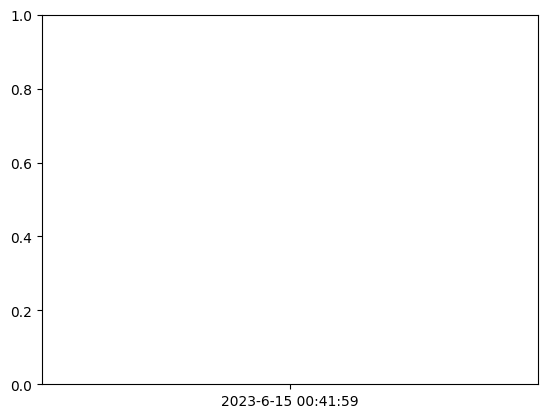

In [ ]:
line = sns.lineplot(x='_key',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

# BME 680

## Verificando a relação da Temperatura BME680, Humidade e Pressão no valor da resistencia do BME 680

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    'humBME',
    'pressBME',
    'tempBME',
    ], color = 'resBME')
grafico.show()

## Visualização dos dados de resistencia ao longo do tempo

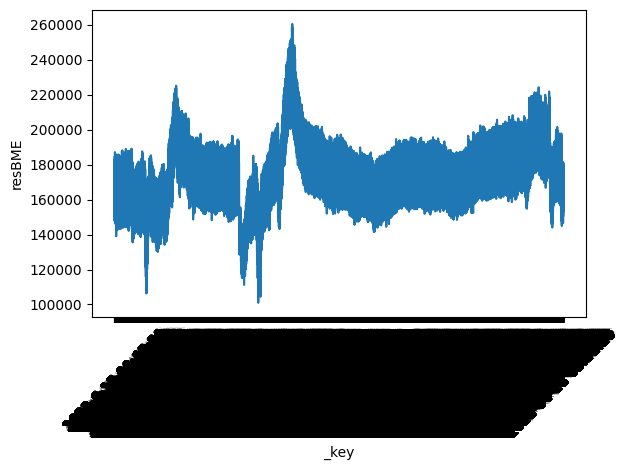

In [ ]:
line = sns.lineplot(x='_key',
                    y='resBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de Pressão no tempo

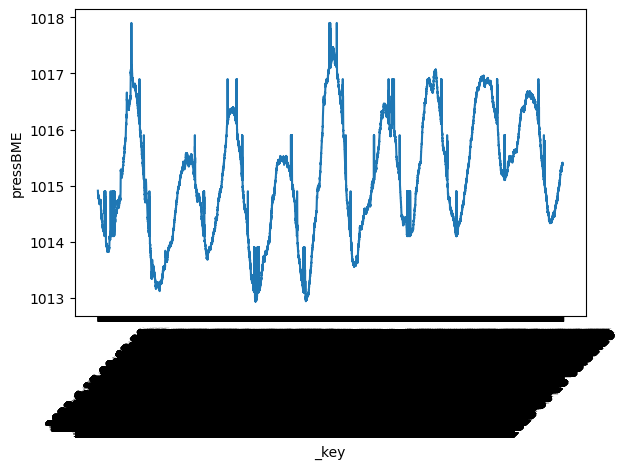

In [ ]:
line = sns.lineplot(x='_key',
                    y='pressBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de Umidade no tempo

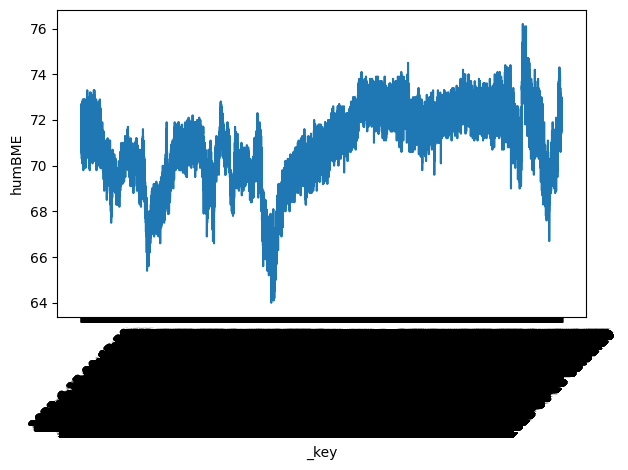

In [ ]:
line = sns.lineplot(x='_key',
                    y='humBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da Luz e do tempo na variação da resistencia do BME 680

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    '_key',
    'tlsLUX',
    ], color = 'resBME')
grafico.show()

## Verificando a relação que a temperatura tem com a resistencia

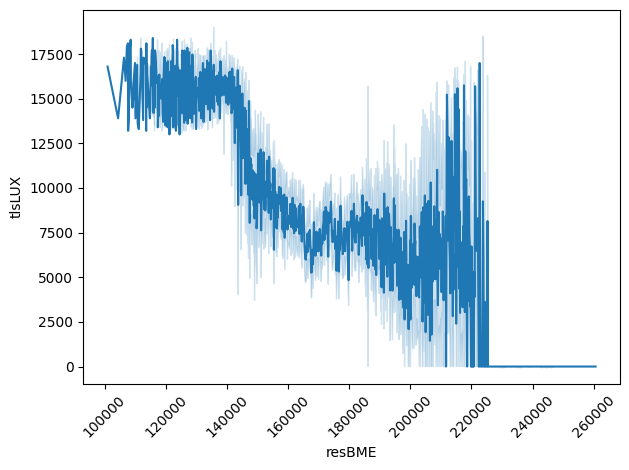

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação do CO2 com a resistencia

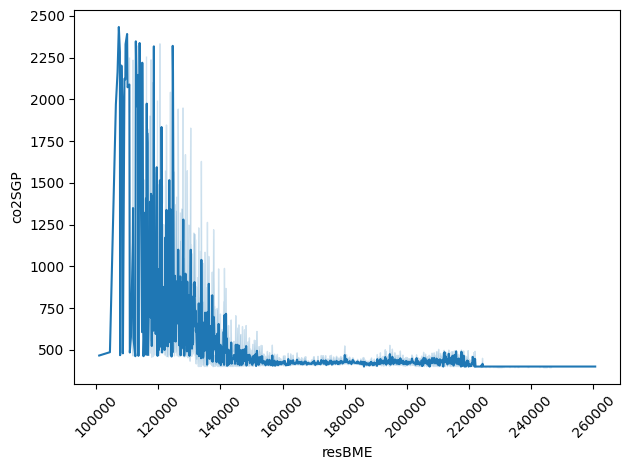

In [ ]:
line = sns.lineplot(x='resBME',
                    y='co2SGP',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da humidade com a resistencia

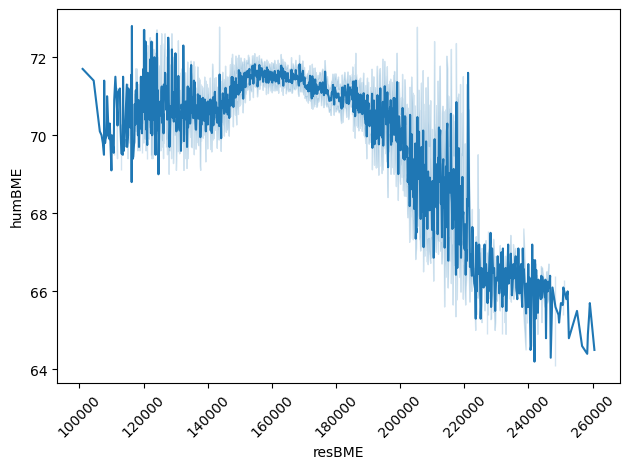

In [ ]:
line = sns.lineplot(x='resBME',
                    y='humBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da pressão com a resistencia

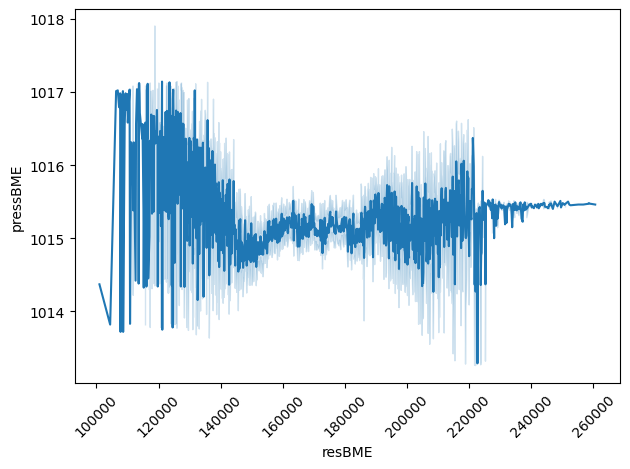

In [ ]:
line = sns.lineplot(x='resBME',
                    y='pressBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de Ethanol com a resistencia

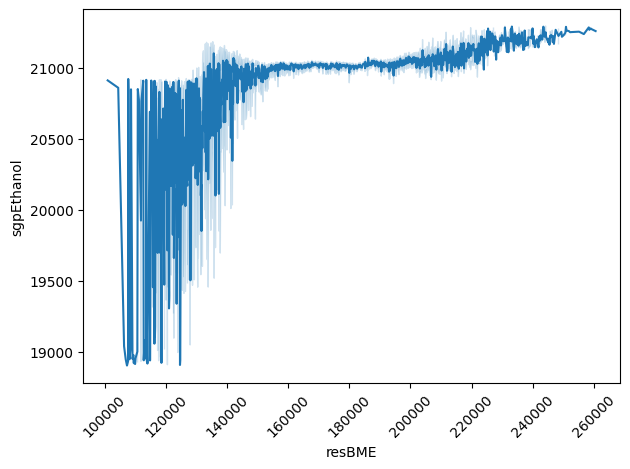

In [ ]:
line = sns.lineplot(x='resBME',
                    y='sgpEthanol',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de H2 com a resistencia

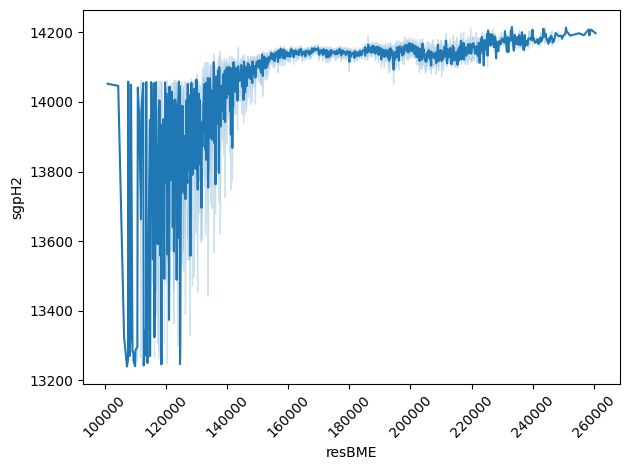

In [ ]:

line = sns.lineplot(x='resBME',
                    y='sgpH2',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de tVOC com a resistencia

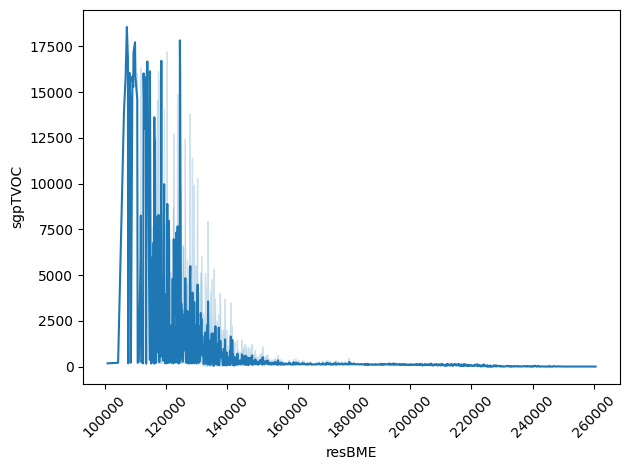

In [ ]:
line = sns.lineplot(x='resBME',
                    y='sgpTVOC',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da temperatura BME 680 com a resistencia

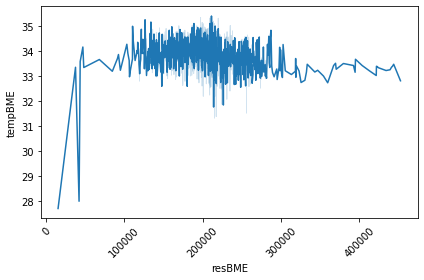

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tempBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da temperatura SHT 31 com a resistencia

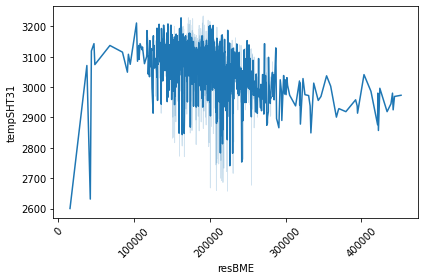

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tempSHT31',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da Lux com a resistencia

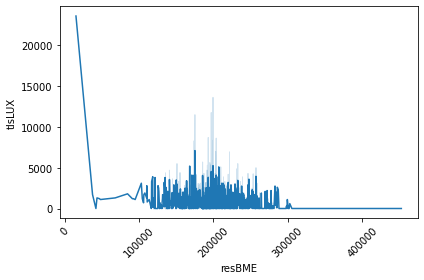

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

# SGP30

## Visualização dos dados de ethanol no tempo

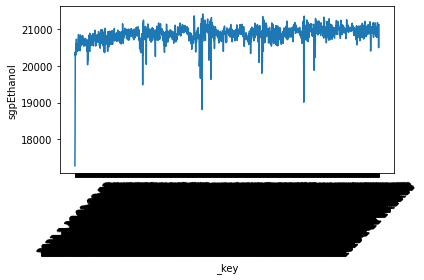

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpEthanol',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de H2 no tempo

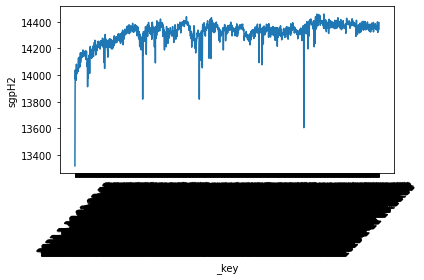

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpH2',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de tVOC no tempo

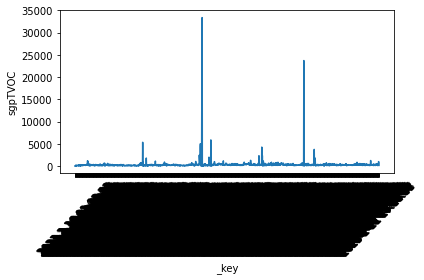

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpTVOC',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a correlação do CO2, Concentração de Ethanol e Concentração de H2 no valor da concentração de tVOC

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    'co2SGP',
    'sgpEthanol',
    'sgpH2',
    ], color = 'sgpTVOC')
grafico.show()